#  MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem in R with MLR Package.

By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | September 12, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

## I Introduction

This project presents a general way to run and compare several supervised learning algorithms applied to the classification problem, evaluating and selecting the best of them according to their performance by using the R library MLR and seven usual metrics: Acc, Kappa, F1, AUC, Sensitivity, and Specificity.

The MLR library is very similar to[ Scikit-Learn ](http://scikit-learn.org/stable).(http://scikit-learn.org/stable/) from Python, wherein you could get all the functions required to do machine learning.

The entire structure of MLR library relies on this premise:

<i>- Create a Task</i>.<br> 
<i>- Make a Learner</i>. <br> 
<i>- Train Them</i>.<br> 

Creating a task means loading data in the package. Making a learner means choosing an algorithm ( learner)
which learns from task (or data). Finally, train them. Here you can learn more about MLR library [  Machine Learning in R: mlr Tutorial  ](https://mlr-org.github.io/mlr-tutorial/devel/html/).

The supervised learning algorithms to be considered here are:

* Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN)
* Classification and Regression Trees (CART)
* Random Forest Classifier (RF)
* Gaussian Naive Bayes (NB)
* Support Vector Machines (SVM)

The dataset contains 5000 registers of clients who asked for a loan. There are six columns of measurements (fields) of the clients. These columns are the variables (features): MontoCredito; IngresoNeto; CoefCreditoAvaluo; MontoCuota; GradoAcademico.

The sixth column is the response variable "Tclient" which has two categories: Bad and Good. The dataset can be gotten from [  here ](http://www.arqmain.net/MLearning/Datasets/Loan2016last.csv).

<b><u>Variables Overview</u></b>

<b>MontoCredito</b> (Credit Amount)<br>
1 Very Low<br>
2 Low<br>
3 Medium<br>
4 High<br>

<b>IngresoNeto</b> (Net Income)<br>
1 Very Low<br>
2 Low<br>
3 Medium<br>
4 High<br>

<b>CoeficienteCreditoAvaluo</b> (CoefficientCreditValuation)<br>
Score from 1 to 12. The bigger the better.<br>

<b>MontoCuota</b> (AmountFee)<br>
1 Very Low<br>
2 Low<br>
3 Medium<br>
4 High<br>

<b>GradoAcademico</b> (AcademicDegree)<br>
1 Bachelor<br>
2 Graduate<br>
3 Master<br>
4 Doctorate<br>

<b>Tclient</b> (Typeclient)<br>
1 Bad<br>
2 Good<br>

The performance metrics are evaluated by using the "train/test split" method.  So, I train models on the "train" dataset and validate them on the "test" one. I use 70% and 20% for the training and testing datasets respectively.  

Special consideration must be done if you have a dataset that admitted more than one variable of classification or different representation's percentage for all the data. As always, we must be careful to get a good photograph of the original dataset in each split dataset that we get.

The dataset used here is unbalanced in a proportion of 70.02% for "Good Clients" and 29.98% for "Bad clients". I use stratified sampling to get the train and test dataset, then I secure the original proportional representation for the categories of the response variable.

By the end of this project we will have covered the following topics, in a very specific way (of course):


* A way to import a dataset from a website to R. 
* A way to use R library to analyze the dataset. 
* A way to use some R libraries to quickly plot charts that could help us to understand the problem. 
* A way to use Machine Learning (ML) using MLR library to perform predictive analysis. 
* A way to compare different ML models, select one from them and present predictions for a new set of data. 
* A way to use analytical as well as technical skills to create an end-to-end project.


## II Loading and checking the data


### 21 Loading the data

In [46]:
# read and attach the dataset
filename <- "http://www.arqmain.net/MLearning/Datasets/Loan2016last.csv"

# load the CSV file from the local directory
df <- read.csv(filename, header=TRUE)
attach(df)


The following objects are masked from df (pos = 9):

    CoefCreditoAvaluo, GradoAcademico, IngresoNeto, MontoCredito,
    MontoCuota, Tclient



### 22 Checking the data

In [47]:
head(df)
names(df)
length(df$Tclient)

MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient
1,2,5,4,2,Good
4,1,12,2,1,Good
1,1,12,4,1,Good
1,1,11,4,2,Good
1,1,12,3,1,Good
3,2,12,3,1,Good


[1] "MontoCredito"      "IngresoNeto"       "CoefCreditoAvaluo"
[4] "MontoCuota"        "GradoAcademico"    "Tclient"

[1] 5000

In [48]:
#summarize full dataset by columns 
library(mlr)
summarizeColumns(df)

name,type,na,mean,disp,median,mad,min,max,nlevs
MontoCredito,integer,0,1.7830,0.9211301,1,0.0000,1,4,0
IngresoNeto,integer,0,1.5508,0.4974624,2,0.0000,1,2,0
CoefCreditoAvaluo,integer,0,10.3406,2.8903741,11,1.4826,1,12,0
MontoCuota,integer,0,2.7340,0.7627322,3,0.0000,1,4,0
GradoAcademico,integer,0,1.4832,0.4997677,1,0.0000,1,2,0
Tclient,factor,0,NA,0.1410000,NA,NA,705,4295,2


### How about missing values?

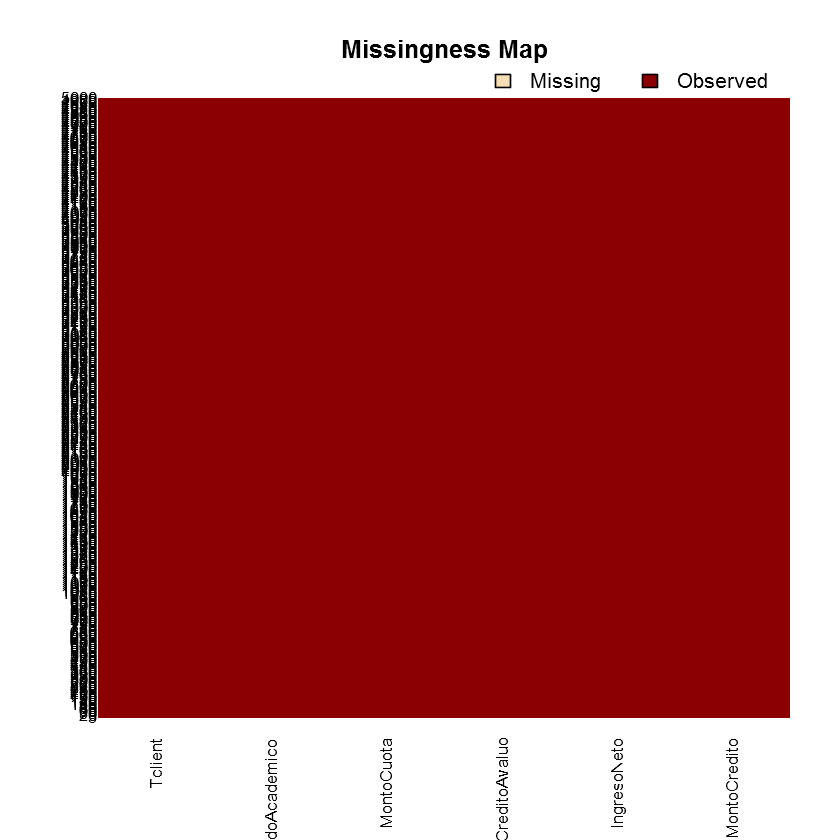

In [49]:
# This is a map for visualizing the missing rows (Package Amelia).

library(Amelia)
missmap(df)

In [50]:
#  A way to find all the rows in a data frame with at least one NA.
(row.has.na <- apply(df, 1, function(x){any(is.na(x))}))
 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [51]:
#  tell R to find all rows with missing values and list them fully.
df[ !complete.cases(df) , ]

MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient


In [52]:
So, there is no missing values in the full dataset.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:3: unexpected ','
1: So,
      ^


## III Getting train and test datasets

In [53]:
#stratified sampling to get the train and test dataset
library(caret)
set.seed(7) # Set Seed so that same sample can be reproduced in future also
# considering response variable as strata
data_part <- createDataPartition(y = df$Tclient,  p = 0.70, list = F)
test <- df[-data_part,] # 30% data goes here
train <- df[data_part,] # 70% here

length(train$Tclient)
length(test$Tclient)

unloadNamespace("caret")


Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train



[1] 3501

[1] 1499

In [54]:
#summarize train and test dataset by columns 
head(train)
head(test)

length(train$Tclient)
length(test$Tclient)

summarizeColumns(train)
summarizeColumns(test)

,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient
2,4,1,12,2,1,Good
3,1,1,12,4,1,Good
7,1,1,12,2,1,Good
8,1,2,12,3,1,Good
10,2,2,12,3,1,Good
11,1,2,7,3,2,Good


,MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico,Tclient
1,1,2,5,4,2,Good
4,1,1,11,4,2,Good
5,1,1,12,3,1,Good
6,3,2,12,3,1,Good
9,2,2,12,3,1,Good
13,2,2,7,1,1,Bad


[1] 3501

[1] 1499

name,type,na,mean,disp,median,mad,min,max,nlevs
MontoCredito,integer,0,1.804342,0.9333464,2,1.4826,1,4,0
IngresoNeto,integer,0,1.557555,0.4967473,2,0.0000,1,2,0
CoefCreditoAvaluo,integer,0,10.288489,2.9478625,11,1.4826,1,12,0
MontoCuota,integer,0,2.736361,0.7648830,3,0.0000,1,4,0
GradoAcademico,integer,0,1.485004,0.4998465,1,0.0000,1,2,0
Tclient,factor,0,NA,0.1411025,NA,NA,494,3007,2


name,type,na,mean,disp,median,mad,min,max,nlevs
MontoCredito,integer,0,1.733155,0.8902611,1,0,1,4,0
IngresoNeto,integer,0,1.535023,0.4989383,2,0,1,2,0
CoefCreditoAvaluo,integer,0,10.462308,2.7485426,12,0,1,12,0
MontoCuota,integer,0,2.728486,0.7579105,3,0,1,4,0
GradoAcademico,integer,0,1.478986,0.4997249,1,0,1,2,0
Tclient,factor,0,NA,0.1407605,NA,NA,211,1288,2


## IV Building models
 
I have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB, and SVM) algorithms. I use "set.seed(7)" so that same sample can be reproduced in the future and also it ensures the results are directly comparable.

The original full dataset does not need to be transformed in any of its features or response variable. All of their codification has been done in an ordinal ascendant way. At the same time, they do not need to be normalized as well.

For MLR, a task is nothing but the data set on which a learner learns. Since it’s a classification problem, we’ll create a classification task. So, the task type solely depends on the type of problem at hand.

Here you can learn more about MLR library [  Machine Learning in R: mlr Tutorial  ](https://github.com/mlr-org/mlr/).

In [55]:
#create a task

trainTask <- makeClassifTask(data = train,target = "Tclient")
testTask <- makeClassifTask(data = test, target = "Tclient")
#head(trainTask)
#head(testTask)

In [56]:
trainTask

Supervised task: train
Type: classif
Target: Tclient
Observations: 3501
Features:
numerics  factors  ordered 
       5        0        0 
Missings: FALSE
Has weights: FALSE
Has blocking: FALSE
Classes: 2
 Bad Good 
 494 3007 
Positive class: Bad

As you can see, it provides a description of train data. However, an evident problem is that it is
considering positive class as Bad, whereas it should be Good. Let’s modify it:

In [57]:
trainTask <- makeClassifTask(data = train,target = "Tclient", positive = "Good")

In [58]:
trainTask 

Supervised task: train
Type: classif
Target: Tclient
Observations: 3501
Features:
numerics  factors  ordered 
       5        0        0 
Missings: FALSE
Has weights: FALSE
Has blocking: FALSE
Classes: 2
 Bad Good 
 494 3007 
Positive class: Good

In [59]:
str(getTaskData(trainTask))


'data.frame':	3501 obs. of  6 variables:
 $ MontoCredito     : int  4 1 1 1 2 1 1 1 3 1 ...
 $ IngresoNeto      : int  1 1 1 2 2 2 2 1 2 1 ...
 $ CoefCreditoAvaluo: int  12 12 12 12 12 7 12 12 1 12 ...
 $ MontoCuota       : int  2 4 2 3 3 3 2 4 1 3 ...
 $ GradoAcademico   : int  1 1 1 1 1 2 2 1 1 2 ...
 $ Tclient          : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 2 2 2 ...


MLR package has an in built function which returns the important variables from data. Let’s see which
variables are important. Later, we can use or not this knowledge to subset out input predictors for model
improvement. 

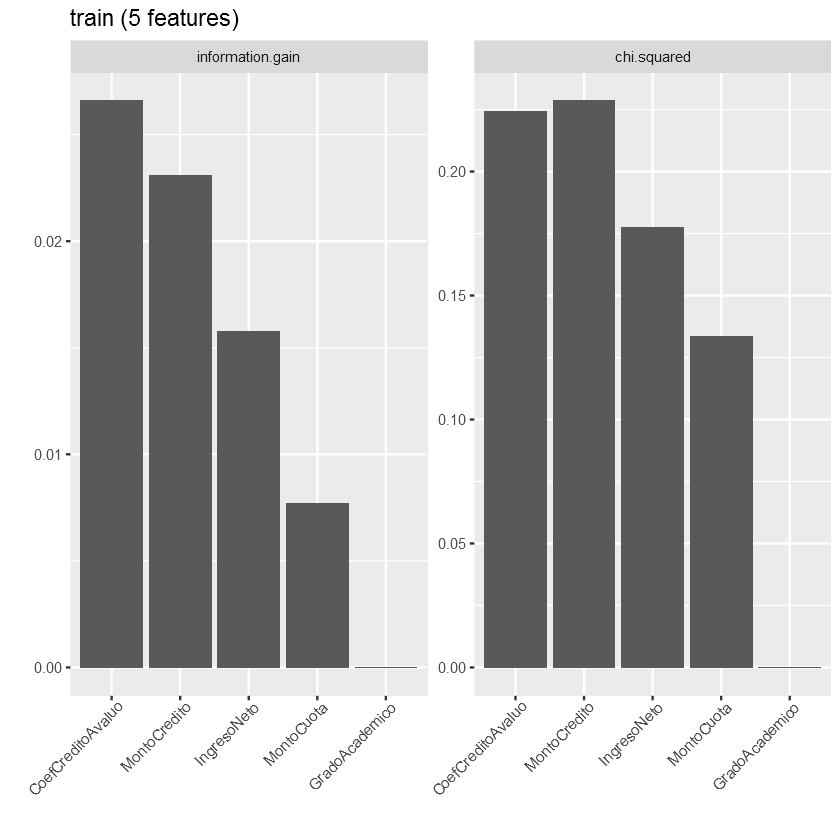

In [60]:
#Feature importance
im_feat <- generateFilterValuesData(trainTask, method = c("information.gain","chi.squared"))
plotFilterValues(im_feat,n.show = 10)

Information gain is generally used in context with decision trees. Every node split in a decision tree is based on information gain. In general, it tries to find out variables which carries the maximum information using which the target class is easier to predict.  Here you can learn more about MLR [  Feature Selection  ](https://mlr-org.github.io/mlr-tutorial/devel/html/feature_selection/index.html).

Let’s start modeling now. With MLR, we can choose and set algorithms using makeLearner. This learner will train on trainTask and try to make predictions on testTask .

### 4.1 Logistic Regression (LR)

In [61]:
#logistic regression
lrn1 = makeLearner("classif.logreg", predict.type = "prob")


In [62]:
#Fit the model (train model)
mod1 = train(lrn1, trainTask)


In [63]:
#Make predictions (predict on test data)
pred1 = predict(mod1, testTask)


In [64]:
#Get performance metrics
round(performance(pred1, measures = list(acc, kappa,f1, auc)),4)

calculateROCMeasures(pred1)
calculateConfusionMatrix(pred1)


acc  kappa     f1    auc 
0.8626 0.0711 0.9257 0.7346

      predicted
true   Bad       Good                          
  Bad  0.05      0.95      tpr: 1    fnr: 0    
  Good 0         1         fpr: 0.95 tnr: 0.05 
       ppv: 0.86 for: 0.33 lrp: 1.05 acc: 0.86 
       fdr: 0.14 npv: 0.67 lrm: 0.08 dor: 12.77


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad     10  201    201
  Good     5 1283      5
  -err.-   5  201    206

### 4.2 Linear Discriminant Analysis (LDA)

In [65]:
#linear discriminant analysis
lrn2 = makeLearner("classif.lda", predict.type = "prob")

In [66]:
#Fit the model (train model)
mod2 = train(lrn2, trainTask)

In [67]:
#Make predictions (predict on test data)
pred2 = predict(mod2, testTask)

In [68]:
#Get performance metrics
round(performance(pred2, measures =list(acc, kappa,f1, auc)),4)

calculateROCMeasures(pred2)
calculateConfusionMatrix(pred2)

acc  kappa     f1    auc 
0.8486 0.0588 0.9173 0.7383

      predicted
true   Bad       Good                         
  Bad  0.06      0.94      tpr: 0.98 fnr: 0.02
  Good 0.02      0.98      fpr: 0.94 tnr: 0.06
       ppv: 0.86 for: 0.69 lrp: 1.04 acc: 0.85
       fdr: 0.14 npv: 0.31 lrm: 0.37 dor: 2.85


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad     13  198    198
  Good    29 1259     29
  -err.-  29  198    227

### 4.3 K-Nearest Neighbors (KNN)

In [69]:
#K-Nearest Neighbors
lrn3 = makeLearner("classif.knn", predict.type = "response")


In [70]:
#Fit the model (train model)
mod3 = train(lrn3, trainTask)


In [71]:
#Make predictions (predict on test data)
pred3 = predict(mod3, testTask)


In [72]:
#Get performance metrics
round(performance(pred3, measures = list(acc, kappa,f1)),4)

calculateROCMeasures(pred3)
calculateConfusionMatrix(pred3)

acc  kappa     f1 
0.9480 0.7732 0.9700

      predicted
true   Bad       Good                           
  Bad  0.75      0.25      tpr: 0.98 fnr: 0.02  
  Good 0.02      0.98      fpr: 0.25 tnr: 0.75  
       ppv: 0.96 for: 0.14 lrp: 3.98 acc: 0.95  
       fdr: 0.04 npv: 0.86 lrm: 0.03 dor: 148.42


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad    159   52     52
  Good    26 1262     26
  -err.-  26   52     78

### 4.4 Classification and Regression Trees (CART)


In [73]:
#Classification and Regression Trees
lrn4 = makeLearner("classif.rpart", predict.type = "prob")

In [74]:
#Fit the model (train model)
mod4 = train(lrn4, trainTask)


In [75]:
#Make predictions (predict on test data)
pred4 = predict(mod4, testTask)


In [76]:
#Get performance metrics
round(performance(pred4, measures = list(acc, kappa,f1, auc)),4)

calculateROCMeasures(pred4)
calculateConfusionMatrix(pred4)


acc  kappa     f1    auc 
0.9486 0.7606 0.9708 0.8686

      predicted
true   Bad       Good                           
  Bad  0.68      0.32      tpr: 0.99 fnr: 0.01  
  Good 0.01      0.99      fpr: 0.32 tnr: 0.68  
       ppv: 0.95 for: 0.06 lrp: 3.12 acc: 0.95  
       fdr: 0.05 npv: 0.94 lrm: 0.01 dor: 274.67


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad    144   67     67
  Good    10 1278     10
  -err.-  10   67     77

### 4.5 Random Forest Classifier (RF)

In [77]:
#Random Forest Classifier 
lrn5 = makeLearner("classif.randomForest", par.vals = list(ntree = 200, mtry = 3), predict.type = "prob")


In [78]:
#Fit the model (train model)
mod5 = train(lrn5, trainTask)


In [79]:
#Make predictions (predict on test data)
pred5 = predict(mod5, testTask)
pred5

Prediction: 1499 observations
predict.type: prob
threshold: Bad=0.50,Good=0.50
time: 0.44
   id truth prob.Bad prob.Good response
1   1  Good     0.00      1.00     Good
4   2  Good     0.00      1.00     Good
5   3  Good     0.00      1.00     Good
6   4  Good     0.00      1.00     Good
9   5  Good     0.00      1.00     Good
13  6   Bad     0.78      0.22      Bad
... (1499 rows, 5 cols)


In [80]:
#Get performance metrics
round(performance(pred5, measures = list(acc, kappa,f1, auc)),4)

calculateROCMeasures(pred5)
calculateConfusionMatrix(pred5)


acc  kappa     f1    auc 
0.9526 0.7869 0.9729 0.9244

      predicted
true   Bad       Good                          
  Bad  0.73      0.27      tpr: 0.99 fnr: 0.01 
  Good 0.01      0.99      fpr: 0.27 tnr: 0.73 
       ppv: 0.96 for: 0.09 lrp: 3.72 acc: 0.95 
       fdr: 0.04 npv: 0.91 lrm: 0.02 dor: 234.9


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad    155   56     56
  Good    15 1273     15
  -err.-  15   56     71

### 4.6 Gaussian Naive Bayes (NB)

In [81]:
#support vector machine
lrn6 = makeLearner("classif.naiveBayes", predict.type = "prob")

In [82]:
#Fit the model (train model)
mod6 = train(lrn6, trainTask)

In [83]:
#Make predictions (predict on test data)
pred6 = predict(mod6, testTask)

In [84]:
#Get performance metrics
round(performance(pred6, measures = list(acc, kappa,f1, auc)),4)

calculateROCMeasures(pred6)
calculateConfusionMatrix(pred6)


acc  kappa     f1    auc 
0.8379 0.0700 0.9106 0.7385

      predicted
true   Bad       Good                         
  Bad  0.09      0.91      tpr: 0.96 fnr: 0.04
  Good 0.04      0.96      fpr: 0.91 tnr: 0.09
       ppv: 0.87 for: 0.73 lrp: 1.06 acc: 0.84
       fdr: 0.13 npv: 0.27 lrm: 0.44 dor: 2.4 


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad     19  192    192
  Good    51 1237     51
  -err.-  51  192    243

### 4.7 Support Vector Machine (SVM)

In [85]:
#support vector machine
lrn7 = makeLearner("classif.ksvm", predict.type = "prob")

In [86]:
#Fit the model (train model)
mod7 = train(lrn7, trainTask)

In [87]:
#Make predictions (predict on test data)
pred7 = predict(mod7, testTask)

In [88]:
#Get performance metrics
round(performance(pred7, measures = list(acc, kappa,f1, auc)),4)

calculateROCMeasures(pred7)
calculateConfusionMatrix(pred7)

acc  kappa     f1    auc 
0.9360 0.6912 0.9637 0.8722

      predicted
true   Bad       Good                           
  Bad  0.6       0.4       tpr: 0.99 fnr: 0.01  
  Good 0.01      0.99      fpr: 0.4  tnr: 0.6   
       ppv: 0.94 for: 0.09 lrp: 2.49 acc: 0.94  
       fdr: 0.06 npv: 0.91 lrm: 0.02 dor: 160.77


Abbreviations:
tpr - True positive rate (Sensitivity, Recall)
fpr - False positive rate (Fall-out)
fnr - False negative rate (Miss rate)
tnr - True negative rate (Specificity)
ppv - Positive predictive value (Precision)
for - False omission rate
lrp - Positive likelihood ratio (LR+)
fdr - False discovery rate
npv - Negative predictive value
acc - Accuracy
lrm - Negative likelihood ratio (LR-)
dor - Diagnostic odds ratio

        predicted
true     Bad Good -err.-
  Bad    127   84     84
  Good    12 1276     12
  -err.-  12   84     96

## V Selecting best model
 
I have considered linear (LR and LDA), nonlinear (KNN, CART, RF, NB, and SVM) algorithms. I reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable. 
 
We now have 7 models and seven usual metrics: Acc, Kappa, F1, AUC, Sensitivity, and Specificity. We need to compare the models to each other and select the one with better metric's performance.

As a general appreciation, all models have good accuracy scores but have an unbalanced dataset and for this kind of data, the accuracy (ACC) is not the best metric to be considered alone.  So we can get a table with the summary of all metric for each of the models.

<table align="left">
  <thead>
  <tr>
    <th >Model</th>
    <th >Acc</th>
    <th>Kappa</th>
    <th>F1</th>
        <th>AUC</th>
            <th>Sensitivity</th>
                <th>Specitivity</th>
  </tr>
    </thead>
      <tbody>
  <tr>
    <td>LR</td>
        <td>0.8626</td>
    <td>0.0711</td>
        <td>0.9257</td>
                <td>0.7346</td>
                        <td>1.00</td>
                                <td>0.05</td>
  </tr>
  <tr>
    <td>LDA</td>
        <td>0.8486</td>
    <td>0.0588</td>
        <td>0.9173</td>
                <td>0.7383</td>
                        <td>0.98</td>
                                <td>0.06</td>
  </tr>
  <tr>
    <td>KNN</td>
        <td>0.9500</td>
    <td>0.7815</td>
        <td>0.9712</td>
                <td>---</td>
                        <td>0.98</td>
                                <td>0.76</td>
  </tr>
  <tr>
    <td>CART</td>
        <td>0.9486</td>
    <td>0.7606</td>
        <td>0.9708</td>
                <td>0.8686</td>
                        <td>0.99</td>
                                <td>0.68</td>
  </tr>
  <tr>
    <td>RF</td>
        <td>0.9506</td>
    <td>0.7764</td>
        <td>0.9718</td>
                <td>0.9226</td>
                        <td>0.99</td>
                                <td>0.72</td>
  </tr>
  <tr>
    <td>NB</td>
        <td>0.8379</td>
    <td>0.7000</td>
        <td>0.9106</td>
                <td>0.7385</td>
                        <td>0.96</td>
                                <td>0.09</td>
  </tr>
    <tr>
    <td>SVM</td>
        <td>0.9360</td>
    <td>0.6926</td>
        <td>0.9637</td>
                <td>0.8656</td>
                        <td>0.99</td>
                                <td>0.61</td>
  </tr>
   </tbody>
</table>

The following chart gives us individual ROC curve plot for each model except KNN. The next one, present all ROC curves in the same plot.  So we can see the differents ROC's shapes and which of the models has a bigger AUC associated metric.  In our case, all models are under RF curve meaning that RF's model is the one which has bigger AUC metric.

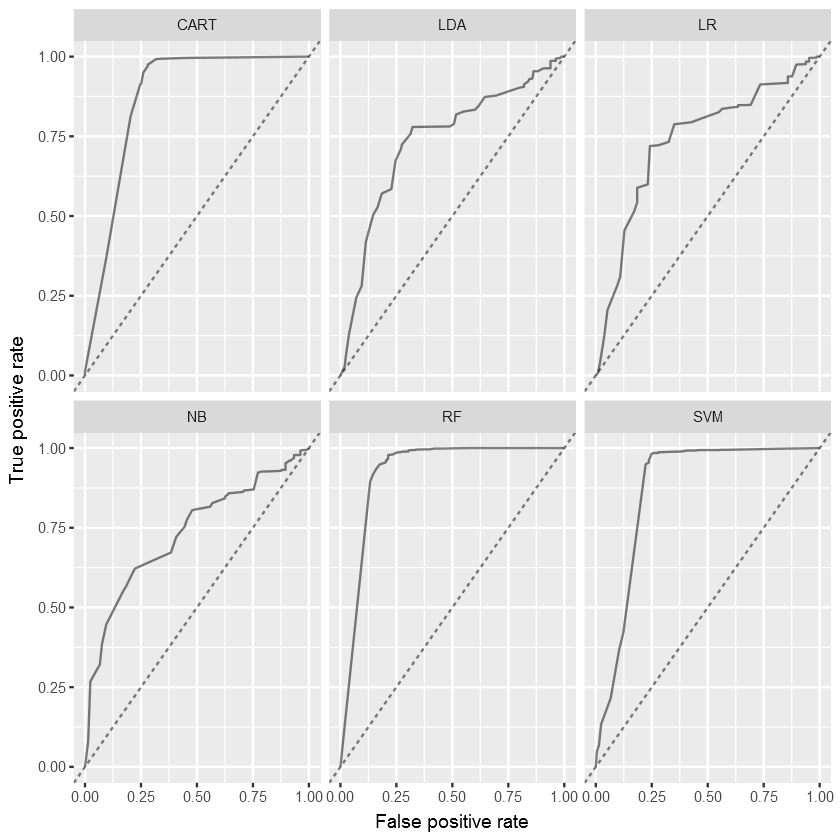

In [89]:
#plot ROC curve
df = generateThreshVsPerfData(list(LR = pred1, LDA = pred2, CART = pred4, RF = pred5, NB = pred6, SVM = pred7), measures = list(fpr, tpr))
plotROCCurves(df)

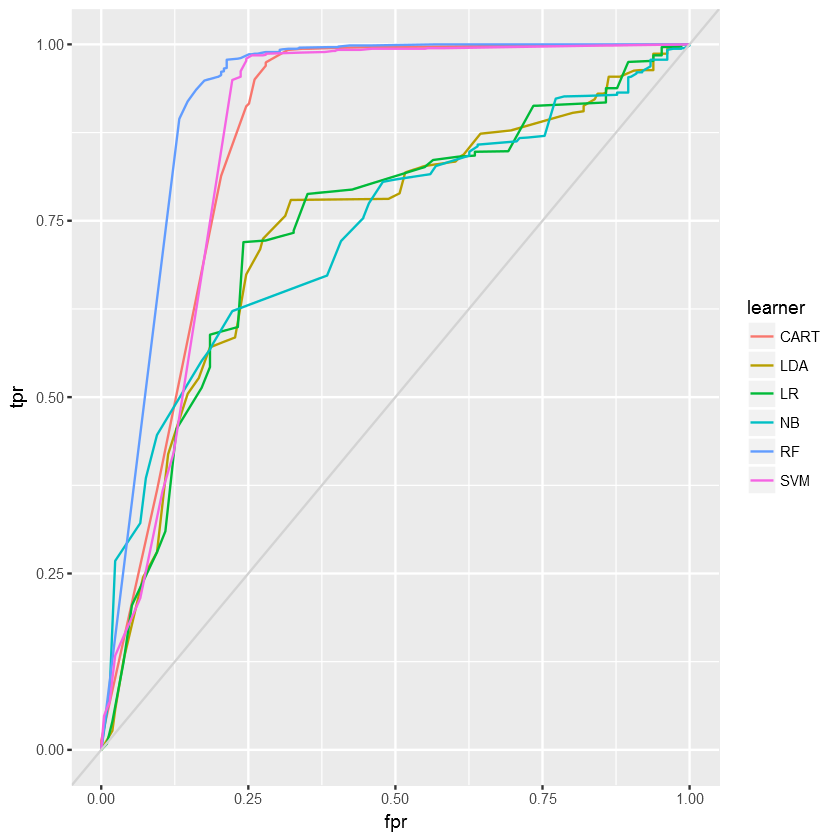

In [90]:
q<-qplot(x = fpr, y = tpr, color = learner, data = df$data, geom = "path")

q + geom_abline(intercept = 0, slope = 1, color="lightgray")


Finally, on evaluating the models, we find that RF (Random Forest) achieves a better training metrics than all the rest. As we were expecting all models have good accuracy scores, but for an unbalanced dataset this metric must no be considered alone. 

## VI Making predictions
 
The RF algorithm was chosen as the best model that we tested. Now we want to get the predictions from the model on our validation set.

In [91]:
as.data.frame(pred5)

,id,truth,prob.Bad,prob.Good,response
1,1,Good,0.000,1.000,Good
4,2,Good,0.000,1.000,Good
5,3,Good,0.000,1.000,Good
6,4,Good,0.000,1.000,Good
9,5,Good,0.000,1.000,Good
13,6,Bad,0.780,0.220,Bad
14,7,Bad,0.990,0.010,Bad
16,8,Bad,0.005,0.995,Good
20,9,Good,0.000,1.000,Good
26,10,Good,0.000,1.000,Good


Now if we want to get the predictions from a new test data, we can do it as follows.

In [93]:
# new test data 
(new_data <- data.frame(MontoCredito=c(1, 1, 2), IngresoNeto=c(2,1,2), CoefCreditoAvaluo=c(5,1,2), MontoCuota=c(4,12,7), GradoAcademico=c(2,1,1)))
# make prediction
prediction = predict(mod5, newdata = new_data)
# show the result
for (i in 1:length(new_data[,1])){
  print(paste("Data",i,":","CLIENT with MontoCredito=", new_data[i,1],"IngresoNeto=", new_data[i,2], "CoefCreditoAvaluo=", new_data[i,3],"MontoCuota=",new_data[i,4],"GradoAcademico=",new_data[i,5], "will be -->", as.data.frame(prediction)$response[i]))
}

MontoCredito,IngresoNeto,CoefCreditoAvaluo,MontoCuota,GradoAcademico
1,2,5,4,2
1,1,1,12,1
2,2,2,7,1


[1] "Data 1 : CLIENT with MontoCredito= 1 IngresoNeto= 2 CoefCreditoAvaluo= 5 MontoCuota= 4 GradoAcademico= 2 will be --> Good"
[1] "Data 2 : CLIENT with MontoCredito= 1 IngresoNeto= 1 CoefCreditoAvaluo= 1 MontoCuota= 12 GradoAcademico= 1 will be --> Bad"
[1] "Data 3 : CLIENT with MontoCredito= 2 IngresoNeto= 2 CoefCreditoAvaluo= 2 MontoCuota= 7 GradoAcademico= 1 will be --> Bad"


## VII Conclusion

This project provides an introduction to get started with predictive analysis using R and MLR library. The idea here is to provide a basic understanding of getting started with a machine learning problem and how to use data visualization to comprehend a problem better.

Improving the models can be done by tuning their parameters. Every Machine Learning model comes with a variety of parameters to tune and these parameters can be vitally important to the performance of our classifier.

Finally, "cross validation" is an approach that you can use to estimate the performance of a machine learning algorithm with less variance than a single "train/test split". Methods like "K-fold Cross Validation", "Leave One Out Cross Validation", and "Repeated Random Test-Train Splits" are the most known ones.  Of course, the door is opening for anybody who wants to try developing this project by using one of those "cross validation" methods to measure the accuracy of the models involved. I am putting in a line to develop a project like that after finishing some other important machine learning stuff that I am already working on.

<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | September 12, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]